### Loading model weight

** The training stpes takes several days with our HPC, so every checkpoints are saved.

** This will also allow checking results at specific checkpoints.

### Visualizing low dimensional layer

#### PCA and t-SNE on the low dimensional layer for visual representation

#### Plotting spectra predictions

In [152]:
from sklearn import preprocessing

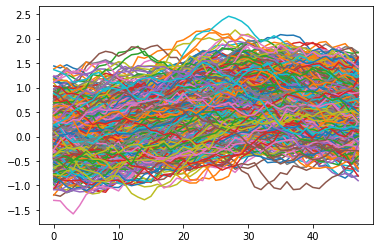

In [162]:
# Plotting some random 500 spectra
for w in range(0,500):
    plt.plot(data_ana[w+500][:])

In [165]:
y1_results = model.predict(np.atleast_3d(data_ana))

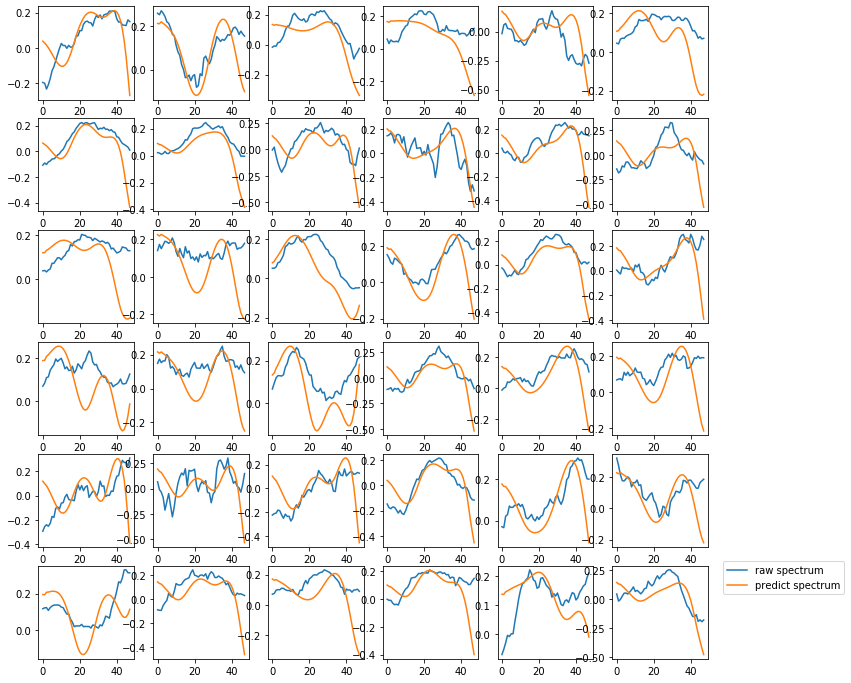

In [166]:
# Plotting Spectra Predictions (randomized for 36 spectra)
fig, axs = plt.subplots(6, 6, figsize=(12, 12))
y1_norm = preprocessing.normalize(k)
y2_norm = preprocessing.normalize(y1_results.reshape(-1,48))
axs.reshape(-1)
for i in range (0,6):
    for j in range(0,6):
        w = np.random.randint(0, y2_norm.shape[0])
        ax = axs[i,j]
        ax.plot(y1_norm[w], label="raw spectrum") 
        ax.plot(y2_norm[w], label="predict spectrum") 
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
plt.title("Spectra Prediction")

### Export results

In [129]:
import keras.backend
import codes.viz as viz2

In [130]:
def get_ith_layer_output(model, X, i, mode='test'):
    """
    Computes the activations of a specific layer
    see https://keras.io/getting-started/faq/#keras-faq-frequently-asked-keras-questions'
    
    Parameters
    ----------
    model : keras model, object
        pre-trained keras model
    X  : numpy array, float
        Input data
    i  : numpy, int
        index of the layer to extract
    mode : string, optional
        test or train, changes the model behavior to scale the network properly when using
        dropout or batchnorm
        
    Returns
    -------
    layer_output : float
        array containing the output from layer i of the network
    """
    # computes the output of the ith layer
    get_ith_layer = keras.backend.function([model.layers[0].input, 
                                            keras.backend.learning_phase()], 
                                           [model.layers[i].output])
    layer_output = get_ith_layer([X, 0 if mode == 'test' else 1])[0]

    return layer_output

In [168]:
activation = get_ith_layer_output(model, np.atleast_3d(k), 3)

In [174]:
activation.shape

(90000, 16)

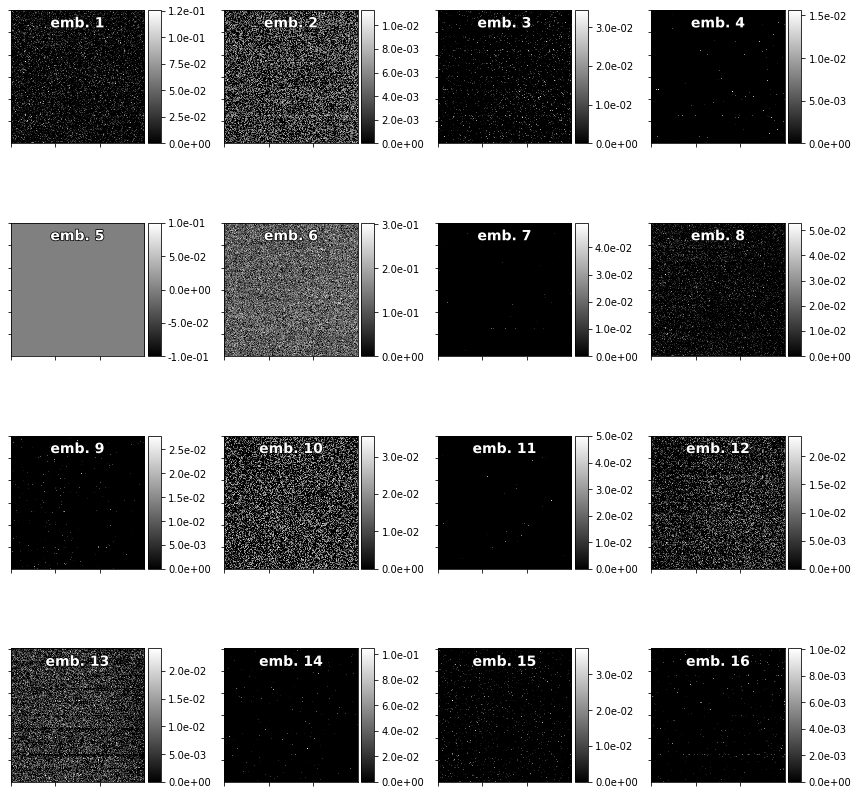

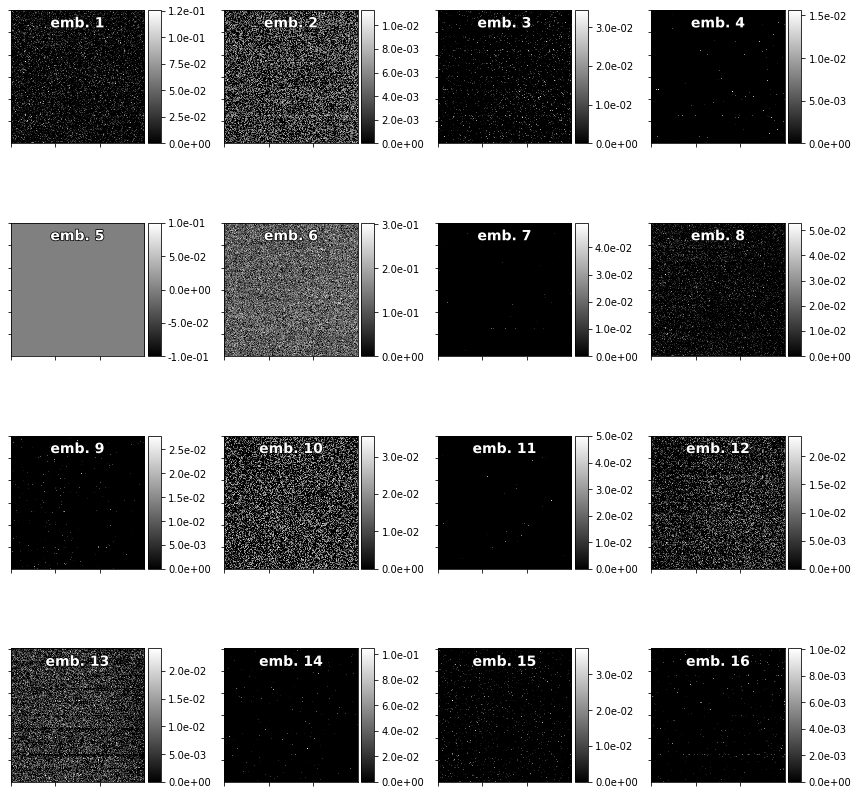

In [181]:
# plots the embedding maps
_ = viz2.plot.embedding_maps(activation,
                        printing,
                        plot_format,
                        'autoencoder/',
                        filename='./embeddings')


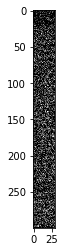

In [190]:
test = activation.reshape(10,300,30,16)
plt.imshow(test[0,:,:,1])